In [4]:
#Customer churn analysis
#Dataset reference: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.options.display.max_rows=99999

In [ ]:
df.head(100)

In [8]:
#Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [12]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [13]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [14]:
x.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [15]:
type(y)

pandas.core.series.Series

In [16]:
#x[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]
le=LabelEncoder()
x_gender_lab=le.fit_transform(x['gender'])
x_Partner_lab=le.fit_transform(x['Partner'])
x_Dependents_lab=le.fit_transform(x['Dependents'])
x_PhoneService_lab=le.fit_transform(x['PhoneService'])
x_MultipleLines_lab=le.fit_transform(x['MultipleLines'])
x_InternetService_lab=le.fit_transform(x['InternetService'])
x_OnlineSecurity_lab=le.fit_transform(x['OnlineSecurity'])
x_OnlineBackup_lab=le.fit_transform(x['OnlineBackup'])
x_DeviceProtection_lab=le.fit_transform(x['DeviceProtection'])
x_TechSupport_lab=le.fit_transform(x['TechSupport'])
x_StreamingTV_lab=le.fit_transform(x['StreamingTV'])
x_StreamingMovies_lab=le.fit_transform(x['StreamingMovies'])
x_Contract_lab=le.fit_transform(x['Contract'])
x_PaperlessBilling_lab=le.fit_transform(x['PaperlessBilling'])
x_PaymentMethod_lab=le.fit_transform(x['PaymentMethod'])

y_churn_lab=le.fit_transform(y)

In [17]:
x_lab=pd.DataFrame([x_gender_lab,x_Partner_lab,x_Dependents_lab,x_PhoneService_lab,x_MultipleLines_lab,x_InternetService_lab,x_OnlineSecurity_lab,x_OnlineBackup_lab,x_DeviceProtection_lab,x_TechSupport_lab,x_StreamingTV_lab,x_StreamingMovies_lab,x_Contract_lab,x_PaperlessBilling_lab,x_PaymentMethod_lab])

In [18]:
x_lab=x_lab.T

In [19]:
x_lab.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [20]:
x_lab=x_lab.rename(columns={0:'x_gender_lab',1:'x_Partner_lab',2:'x_Dependents_lab',3:'x_PhoneService_lab',4:'x_MultipleLines_lab',5:'x_InternetService_lab',6:'x_OnlineSecurity_lab',7:'x_OnlineBackup_lab',8:'x_DeviceProtection_lab',9:'x_TechSupport_lab',10:'x_StreamingTV_lab',11:'x_StreamingMovies_lab',12:'x_Contract_lab',13:'x_PaperlessBilling_lab',14:'x_PaymentMethod_lab'})

In [ ]:
x_lab.head(50)

In [22]:
x_lab['SeniorCitizen']=df['SeniorCitizen']
x_lab['tenure']=df['tenure']
x_lab['MonthlyCharges']=df['MonthlyCharges']
x_lab['TotalCharges']=df['TotalCharges']
x_lab['Churn']=y_churn_lab



In [23]:
x_lab.head(10)

,x_gender_lab,x_Partner_lab,x_Dependents_lab,x_PhoneService_lab,x_MultipleLines_lab,x_InternetService_lab,x_OnlineSecurity_lab,x_OnlineBackup_lab,x_DeviceProtection_lab,x_TechSupport_lab,x_StreamingTV_lab,x_StreamingMovies_lab,x_Contract_lab,x_PaperlessBilling_lab,x_PaymentMethod_lab,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,108.15,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,151.65,1
5,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,0,8,99.65,820.50,1
6,1,0,1,1,2,1,0,2,0,0,2,0,0,1,1,0,22,89.10,1949.40,0
7,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3,0,10,29.75,301.90,0
8,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2,0,28,104.80,3046.05,1
9,1,0,1,1,0,0,2,2,0,0,0,0,1,0,0,0,62,56.15,3487.95,0


In [24]:
x_lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   x_gender_lab            7043 non-null   int32  
 1   x_Partner_lab           7043 non-null   int32  
 2   x_Dependents_lab        7043 non-null   int32  
 3   x_PhoneService_lab      7043 non-null   int32  
 4   x_MultipleLines_lab     7043 non-null   int32  
 5   x_InternetService_lab   7043 non-null   int32  
 6   x_OnlineSecurity_lab    7043 non-null   int32  
 7   x_OnlineBackup_lab      7043 non-null   int32  
 8   x_DeviceProtection_lab  7043 non-null   int32  
 9   x_TechSupport_lab       7043 non-null   int32  
 10  x_StreamingTV_lab       7043 non-null   int32  
 11  x_StreamingMovies_lab   7043 non-null   int32  
 12  x_Contract_lab          7043 non-null   int32  
 13  x_PaperlessBilling_lab  7043 non-null   int32  
 14  x_PaymentMethod_lab     7043 non-null   

In [25]:
unique, counts = np.unique(y_churn_lab, return_counts=True)
print(np.asarray((unique, counts)))

[[   0    1]
 [5174 1869]]


In [26]:
x_lab.isnull().sum()

x_gender_lab               0
x_Partner_lab              0
x_Dependents_lab           0
x_PhoneService_lab         0
x_MultipleLines_lab        0
x_InternetService_lab      0
x_OnlineSecurity_lab       0
x_OnlineBackup_lab         0
x_DeviceProtection_lab     0
x_TechSupport_lab          0
x_StreamingTV_lab          0
x_StreamingMovies_lab      0
x_Contract_lab             0
x_PaperlessBilling_lab     0
x_PaymentMethod_lab        0
SeniorCitizen              0
tenure                     0
MonthlyCharges             0
TotalCharges              11
Churn                      0
dtype: int64

In [27]:
x_lab.dropna(inplace=True)

In [28]:
x_lab=x_lab.reset_index(drop=True)

In [29]:
y_churn_lab=x_lab['Churn']
x_lab=x_lab.iloc[:,:-1]

In [30]:
x_lab.isnull().sum()

x_gender_lab              0
x_Partner_lab             0
x_Dependents_lab          0
x_PhoneService_lab        0
x_MultipleLines_lab       0
x_InternetService_lab     0
x_OnlineSecurity_lab      0
x_OnlineBackup_lab        0
x_DeviceProtection_lab    0
x_TechSupport_lab         0
x_StreamingTV_lab         0
x_StreamingMovies_lab     0
x_Contract_lab            0
x_PaperlessBilling_lab    0
x_PaymentMethod_lab       0
SeniorCitizen             0
tenure                    0
MonthlyCharges            0
TotalCharges              0
dtype: int64

Text(0.5, 1.02, 'Count of TARGET Variable per category')

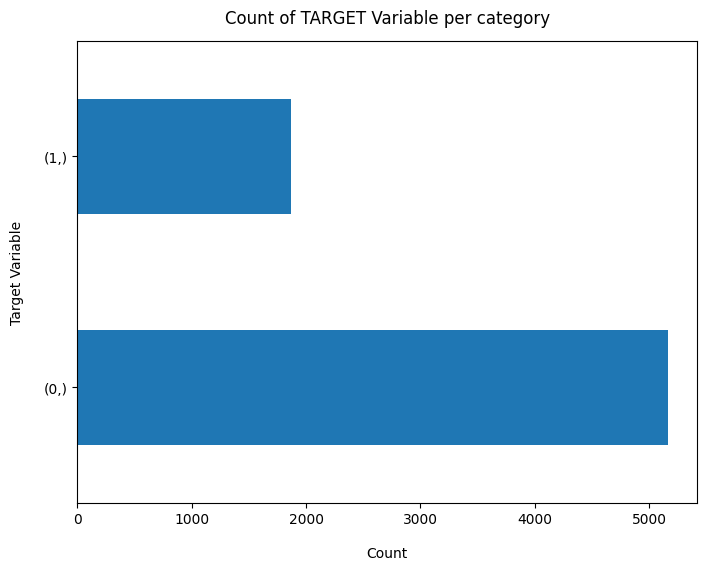

In [31]:
pd.DataFrame(y_churn_lab).value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14 )
plt.title("Count of TARGET Variable per category", y=1.02)

<Axes: >

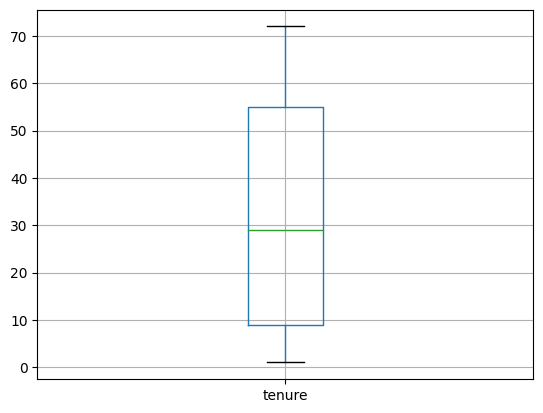

In [32]:
x_lab.boxplot(column='tenure')

In [33]:
tenure_quant=x_lab['tenure'].quantile([0.0,0.15,0.25,0.50,0.75,0.90,0.99,1.0])

In [34]:
print(tenure_quant)

0.00     1.0
0.15     4.0
0.25     9.0
0.50    29.0
0.75    55.0
0.90    69.0
0.99    72.0
1.00    72.0
Name: tenure, dtype: float64


In [35]:
from scipy.stats import skew
skew(x_lab['tenure'])

0.23768011839839964

In [36]:
MonthlyCharges_quant=x_lab['MonthlyCharges'].quantile([0.0,0.15,0.25,0.50,0.75,0.90,0.99,1.0])

In [37]:
print(MonthlyCharges_quant)

0.00     18.2500
0.15     20.6000
0.25     35.5875
0.50     70.3500
0.75     89.8625
0.90    102.6450
0.99    114.7345
1.00    118.7500
Name: MonthlyCharges, dtype: float64


<Axes: >

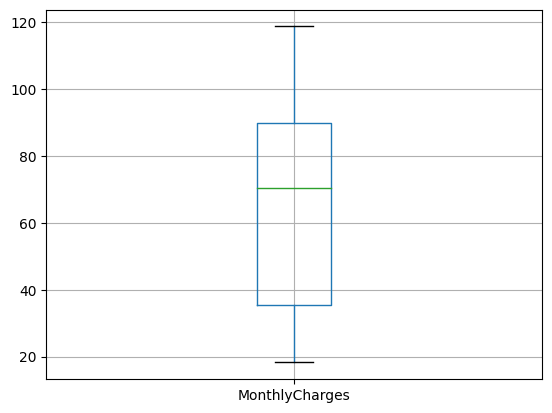

In [38]:
x_lab.boxplot(column='MonthlyCharges')

In [39]:
skew(x_lab['MonthlyCharges'])

-0.22205554798978874

<Axes: >

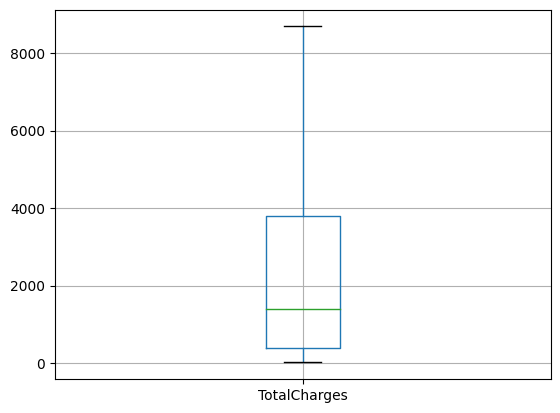

In [40]:
x_lab.boxplot(column='TotalCharges')

In [41]:
TotalCharges_quant=x_lab['TotalCharges'].quantile([0.0,0.15,0.25,0.50,0.75,0.90,0.99,1.0])

In [42]:
print(TotalCharges_quant)

0.00      18.8000
0.15     164.5650
0.25     401.4500
0.50    1397.4750
0.75    3794.7375
0.90    5976.6400
0.99    8039.8830
1.00    8684.8000
Name: TotalCharges, dtype: float64


In [43]:
skew(x_lab['TotalCharges'])

0.9614373590490068

In [44]:
skew(x_lab['TotalCharges'])

0.9614373590490068

In [45]:
x_lab.isnull().sum()

x_gender_lab              0
x_Partner_lab             0
x_Dependents_lab          0
x_PhoneService_lab        0
x_MultipleLines_lab       0
x_InternetService_lab     0
x_OnlineSecurity_lab      0
x_OnlineBackup_lab        0
x_DeviceProtection_lab    0
x_TechSupport_lab         0
x_StreamingTV_lab         0
x_StreamingMovies_lab     0
x_Contract_lab            0
x_PaperlessBilling_lab    0
x_PaymentMethod_lab       0
SeniorCitizen             0
tenure                    0
MonthlyCharges            0
TotalCharges              0
dtype: int64

In [46]:
y_churn_lab.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7032 entries, 0 to 7031
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7032 non-null   int32
dtypes: int32(1)
memory usage: 27.6 KB


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_lab,y_churn_lab,test_size = 0.3 , random_state=42)

In [ ]:
x_train

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
x_train

array([[-1.02177294, -0.96250651, -0.65003335, ..., -0.95231603,
        -0.20259975, -0.76731513],
       [ 0.97869102, -0.96250651, -0.65003335, ..., -0.26220733,
        -0.10132736, -0.30655945],
       [-1.02177294, -0.96250651, -0.65003335, ..., -1.19588381,
         0.17758674, -0.90853513],
       ...,
       [ 0.97869102, -0.96250651, -0.65003335, ..., -0.95231603,
         0.54947222, -0.65916731],
       [-1.02177294, -0.96250651, -0.65003335, ...,  0.71206379,
        -1.48925708, -0.56870516],
       [ 0.97869102,  1.03895401, -0.65003335, ..., -0.50577511,
         0.30044176, -0.35893111]])

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=160,max_depth=12)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=160)

In [52]:
y_pred = rf.predict(x_test)

In [53]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)

print(accuracy_score(y_test,y_pred))

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report 
cm = confusion_matrix(y_test,y_pred) 
print(cm)

acc=round(accuracy_score(y_test,y_pred),3)
print(acc)

[[1389  160]
 [ 279  282]]
0.792


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [56]:
columns=['x_gender_lab','x_Partner_lab','x_Dependents_lab','x_PhoneService_lab','x_MultipleLines_lab','x_InternetService_lab','x_OnlineSecurity_lab','x_OnlineBackup_lab','x_DeviceProtection_lab','x_TechSupport_lab','x_StreamingTV_lab','x_StreamingMovies_lab','x_Contract_lab','x_PaperlessBilling_lab','x_PaymentMethod_lab']

In [57]:
#{'0':'x_gender_lab','1':'x_Partner_lab','2':'x_Dependents_lab','3':'x_PhoneService_lab','4':'x_MultipleLines_lab','5':'x_InternetService_lab','6':'x_OnlineSecurity_lab','7':'x_OnlineBackup_lab','8':'x_DeviceProtection_lab','9':'x_TechSupport_lab','10':'x_StreamingTV_lab','11':'x_StreamingMovies_lab','12':'x_Contract_lab','13':'x_PaperlessBilling_lab','14':'x_PaymentMethod_lab'})

In [58]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred1=lg.predict(x_test)

In [59]:
acc1=round(accuracy_score(y_test,y_pred1),3)
print(acc1)

0.799


In [60]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)

In [61]:
acc2=round(accuracy_score(y_test,y_pred2),3)
print(acc2)

0.72


In [62]:
from sklearn.svm import SVC
sv=SVC(kernel='linear', C=1.0)
sv.fit(x_train,y_train)
y_pred3=sv.predict(x_test)

In [63]:
acc3=round(accuracy_score(y_test,y_pred3),3)
acc3

0.787

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define the individual models
models = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

# Create the Voting classifier
voting = VotingClassifier(estimators=models, voting='hard')

# Train the model
voting.fit(x_train, y_train)

# Make predictions
y_pred = voting.predict(x_test)


In [65]:
print(accuracy_score(y_test,y_pred))

0.7990521327014218


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [67]:
l1=['RandomForest','LogisticRegression','DecisionTreeClassifier','SupportVectorMachine']
l2=[acc,acc1,acc2,acc3]
l=[1,2,3,4]
sorted_data = sorted(zip(l1, l2), key=lambda pair: pair[1])
sorted_x = [pair[0] for pair in sorted_data]
sorted_y = [pair[1] for pair in sorted_data]

<function matplotlib.pyplot.show(close=None, block=None)>

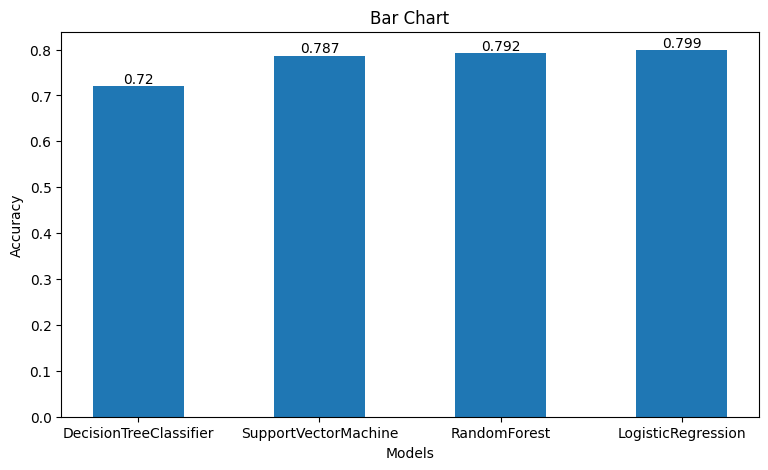

In [68]:
plt.figure(figsize=(9, 5))
plt.bar(sorted_x,sorted_y,width= 0.5)
for i, v in enumerate(sorted_y):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Bar Chart')

plt.show

In [69]:
pip install imblearn

In [73]:
from imblearn.combine import SMOTEENN
smnn = SMOTEENN(random_state=42)
X_resamp, y_resamp = smnn.fit_resample(x_lab, y_churn_lab)

In [75]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resamp, y_resamp,test_size=0.2)

In [76]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6)

In [77]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, random_state=100)

In [78]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [81]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [85]:
from sklearn.metrics import classification_report
print(model_score_r1)
print(classification_report(yr_test1, yr_predict1))

0.9307432432432432
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       549
           1       0.92      0.96      0.94       635

    accuracy                           0.93      1184
   macro avg       0.93      0.93      0.93      1184
weighted avg       0.93      0.93      0.93      1184



In [ ]:
#the accuracy has improved to 93%

In [87]:
import pickle

In [89]:
filename = 'model.sav'

In [91]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [93]:
load_model = pickle.load(open(filename, 'rb'))

In [95]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [97]:
model_score_r1

0.9307432432432432

## Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.